In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
!pip install feature_engine
from feature_engine import encoding
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder



# Análise e Exploraçao de Dados

In [4]:
#file_id = "1JfpX_XstcA0mRfLdQel6RA0ffCrFLJYR"
#file_path = f"https://drive.google.com/uc?id={file_id}"

dados = pd.read_csv('desafio_indicium_imdb.csv')
print(dados.head())

   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  W

In [5]:
dados.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [6]:
dados.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
dados.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [8]:
def first_looking(col):
    print("Nome da coluna   : ", col)
    print("--------------------------------")
    print("% de nulss  : ", "%", round(dados[col].isnull().sum()/dados.shape[0]*100, 2))
    print("Número de nulls   : ", dados[col].isnull().sum())
    print("Quantidade de valores únicos : ", dados[col].nunique())
    print(dados[col].value_counts(dropna = False))

In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


In [10]:
dados.nunique()

Series_Title     998
Released_Year    100
Certificate       16
Runtime          140
Genre            202
IMDB_Rating       16
Overview         999
Meta_score        63
Director         548
Star1            659
Star2            840
Star3            890
Star4            938
No_of_Votes      998
Gross            822
dtype: int64

In [11]:
first_looking('Genre')

Nome da coluna   :  Genre
--------------------------------
% de nulss  :  % 0.0
Número de nulls   :  0
Quantidade de valores únicos :  202
Genre
Drama                        84
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Action, Adventure, Family     1
Action, Crime, Mystery        1
Animation, Drama, Romance     1
Drama, War, Western           1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64


---
Conclusões Iniciais
*   Em um visão rápida podemos ver que temos 999 linhas e 15 colunas
*   Das 15 colunas apenas 4 do tipo númerico


*   Uma boa parte dos dados são praticamente exclusivos, ou seja, cada linha um valor diferente
*   Tem também a linhas Unnamed 0, que parece ser uma coluna dos indices, a única diferença é que começa em 1 e não em 0
* Temos filmes de pelo menos 100 anos diferentes

*   O IBM_rating tem uma pequena variedade de notas a maioria fica entre 7 e 8
*   A faixa etária têm muitas, acredito que possam ser agrupados para refletir melhor os grupos de idade

*   A coluna genêro tem muitas informações, muitas até repetitivas







---



In [12]:
# @title Dicionário dos dados
dict_dados = pd.DataFrame([
    {
        'variavel': 'Title',
        'descricao': 'Título do filme',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },
    {
        'variavel': 'Released_Year',
        'descricao': 'Ano de lançamento',
        'tipo': 'qualitativa',
        'subtipo': 'ordinal'
    },
    {
        'variavel': 'Certificate',
        'descricao': 'Classificação indicativa',
        'tipo': 'qualitativa',
        'subtipo': 'ordinal'
    },
    {
        'variavel': 'Runtime',
        'descricao': 'Duração do filme',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    {
        'variavel': 'Genre',
        'descricao': 'Gênero do filme',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },
    {
        'variavel': 'IMDB_Rating',
        'descricao': 'Nota do IMDB',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    {
        'variavel': 'Overview',
        'descricao': 'Resumo do filme',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },
    {
        'variavel': 'Meta_score',
        'descricao': 'Nota do metacritic',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    {
        'variavel': 'Director',
        'descricao': 'Diretor do filme',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },
    {
        'variavel': 'Star1',
        'descricao': 'Primeiro ator ou Protagonista',
        'tipo': 'qualitativa',
        'subtipo': 'nominal'
    },
    {
        'variavel':'No_of_Votes',
        'descricao': 'Número de votos',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    },
    {
        'variavel': 'Gross',
        'descricao': 'Receita do filme',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'

    },
     {
        'variavel': 'Runtime_min',
        'descricao': 'Tempo do filme em minutos',
        'tipo': 'quantitativa',
        'subtipo': 'contínua'
    }
])

In [13]:
dict_dados

,variavel,descricao,tipo,subtipo
0,Title,Título do filme,qualitativa,nominal
1,Released_Year,Ano de lançamento,qualitativa,ordinal
2,Certificate,Classificação indicativa,qualitativa,ordinal
3,Runtime,Duração do filme,quantitativa,contínua
4,Genre,Gênero do filme,qualitativa,nominal
5,IMDB_Rating,Nota do IMDB,quantitativa,contínua
6,Overview,Resumo do filme,qualitativa,nominal
7,Meta_score,Nota do metacritic,quantitativa,contínua
8,Director,Diretor do filme,qualitativa,nominal
9,Star1,Primeiro ator ou Protagonista,qualitativa,nominal


In [14]:
filmes_ano = dados.groupby('Released_Year')['Released_Year'].count()
filmes_ano = pd.DataFrame(filmes_ano)
filmes_ano.rename(columns = {'Released_Year': 'Quantidade de filmes'}, inplace = True)
filmes_ano.reset_index(inplace = True)
#Apagar o valor inválido 'PG'
filmes_ano = filmes_ano[filmes_ano['Released_Year'] != 'PG'].astype(int)

In [15]:
filmes_ano.head()

,Released_Year,Quantidade de filmes
0,1920,1
1,1921,1
2,1922,1
3,1924,1
4,1925,2


In [16]:
#Quantidade filmes lançados ao longo das decadas

bins= [1900,1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020,2025]
filmes_ano['Decada'] = pd.cut(filmes_ano['Released_Year'], bins = bins, right=False)
filmes_per_decada = filmes_ano.groupby('Decada')['Quantidade de filmes'].sum()
filmes_per_decada = pd.DataFrame(filmes_per_decada).reset_index()
#filmes_per_decada['IMDB_RATING'] = filmes_ano.groupby('Decada')['IMDB_Rating'].mean()

C:\Users\Kevely Wiliam\AppData\Local\Temp\ipykernel_9396\2080958490.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filmes_per_decada = filmes_ano.groupby('Decada')['Quantidade de filmes'].sum()


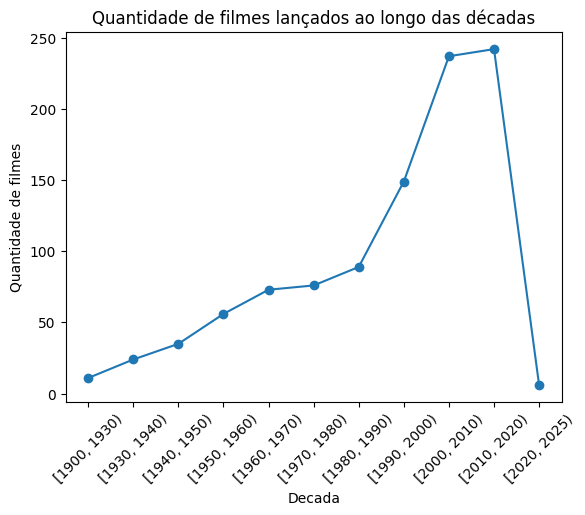

In [17]:
plt.plot(filmes_per_decada['Decada'].astype(str), filmes_per_decada['Quantidade de filmes'], marker = 'o')
plt.title('Quantidade de filmes lançados ao longo das décadas')
plt.xlabel('Decada')
plt.ylabel('Quantidade de filmes')
plt.xticks(rotation = 45)
plt.show();

In [18]:
dict_dados

,variavel,descricao,tipo,subtipo
0,Title,Título do filme,qualitativa,nominal
1,Released_Year,Ano de lançamento,qualitativa,ordinal
2,Certificate,Classificação indicativa,qualitativa,ordinal
3,Runtime,Duração do filme,quantitativa,contínua
4,Genre,Gênero do filme,qualitativa,nominal
5,IMDB_Rating,Nota do IMDB,quantitativa,contínua
6,Overview,Resumo do filme,qualitativa,nominal
7,Meta_score,Nota do metacritic,quantitativa,contínua
8,Director,Diretor do filme,qualitativa,nominal
9,Star1,Primeiro ator ou Protagonista,qualitativa,nominal


In [19]:
dados['Runtime_min'] = dados['Runtime'].str.replace(' min', '').astype(int)
dados['Runtime_min']

0      175
1      152
2      202
3       96
4      201
      ... 
994    115
995    201
996    118
997     97
998     86
Name: Runtime_min, Length: 999, dtype: int64

[]

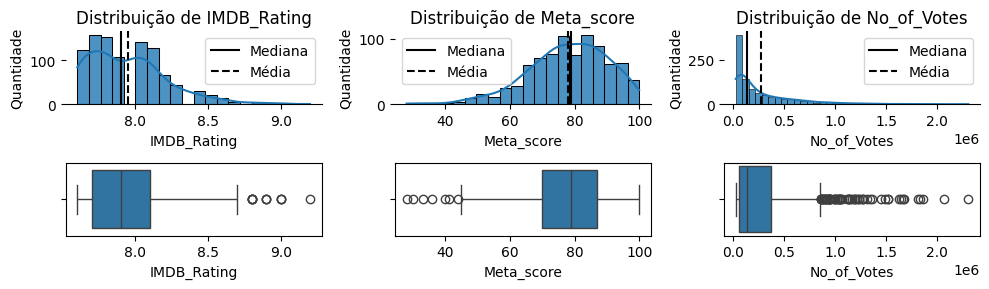

In [20]:
#salvando as variaveis quant continuas

variaveis_quantitativas = ['IMDB_Rating', 'Meta_score', 'No_of_Votes',]

#Plotando os gráficos de Distribuição

fig, axes = plt.subplots(figsize=(10, 3), ncols=3, nrows=2, gridspec_kw={"height_ratios": [5, 5]})

for i, variavel in enumerate(variaveis_quantitativas):
    ax = sns.histplot(data=dados, x=variavel, ax=axes[0, i], kde=True, alpha=.8)
    ax.axvline(dados[variavel].median(), color="black", label="Mediana")
    ax.axvline(dados[variavel].mean(), color="black", linestyle="--", label="Média")
    ax.set(title=f"Distribuição de {variavel}", ylabel="Quantidade")
    ax.legend()
    ax.spines["bottom"].set_color("black")
    ax.grid(False, axis="x")
    for side in ["left", "top", "right"]:
        ax.spines[side].set_visible(False)
    ax = sns.boxplot(data=dados, x=variavel, ax=axes[1, i])


plt.tight_layout()
plt.plot()

---

*   No IMDB_Rating podemos ver que os dados estão assimétricamente a direita,tanto a média quanto a mediana consegue refletir bem os valores dos dados, mesmo que não tenhamos o valor da média no dataset temos valores em volta dela
*   O boxplot do IMDB_Rating também esta bem ajustado mostrando que não existe uma dispersão muito grande de valores, e também poucos outliers


*   Na distribuição do Meta Score temos algo mais parecidp com uma distribuição normal
*   Muitos outlier negativos ou baixos, diferente do IMBD Rating que apresenta apenas outlier positivos

*   O número de votos apresenta uma quantidade massiva de outlier, e também uma distribuição bastante assimétrica. Muito provavelmente por contas do formato dos valores







In [21]:
# Gross
variaveis_quantitativas.append('Runtime_min')
variaveis_quantitativas

['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime_min']

In [22]:
dados[variaveis_quantitativas].describe()

,IMDB_Rating,Meta_score,No_of_Votes,Runtime_min
count,999.000000,842.000000,9.990000e+02,999.000000
mean,7.947948,77.969121,2.716214e+05,122.871872
std,0.272290,12.383257,3.209126e+05,28.101227
min,7.600000,28.000000,2.508800e+04,45.000000
25%,7.700000,70.000000,5.547150e+04,103.000000
50%,7.900000,79.000000,1.383560e+05,119.000000
75%,8.100000,87.000000,3.731675e+05,137.000000
max,9.200000,100.000000,2.303232e+06,321.000000


In [23]:
dados['Gross'].describe()

count           830
unique          822
top       4,360,000
freq              5
Name: Gross, dtype: object

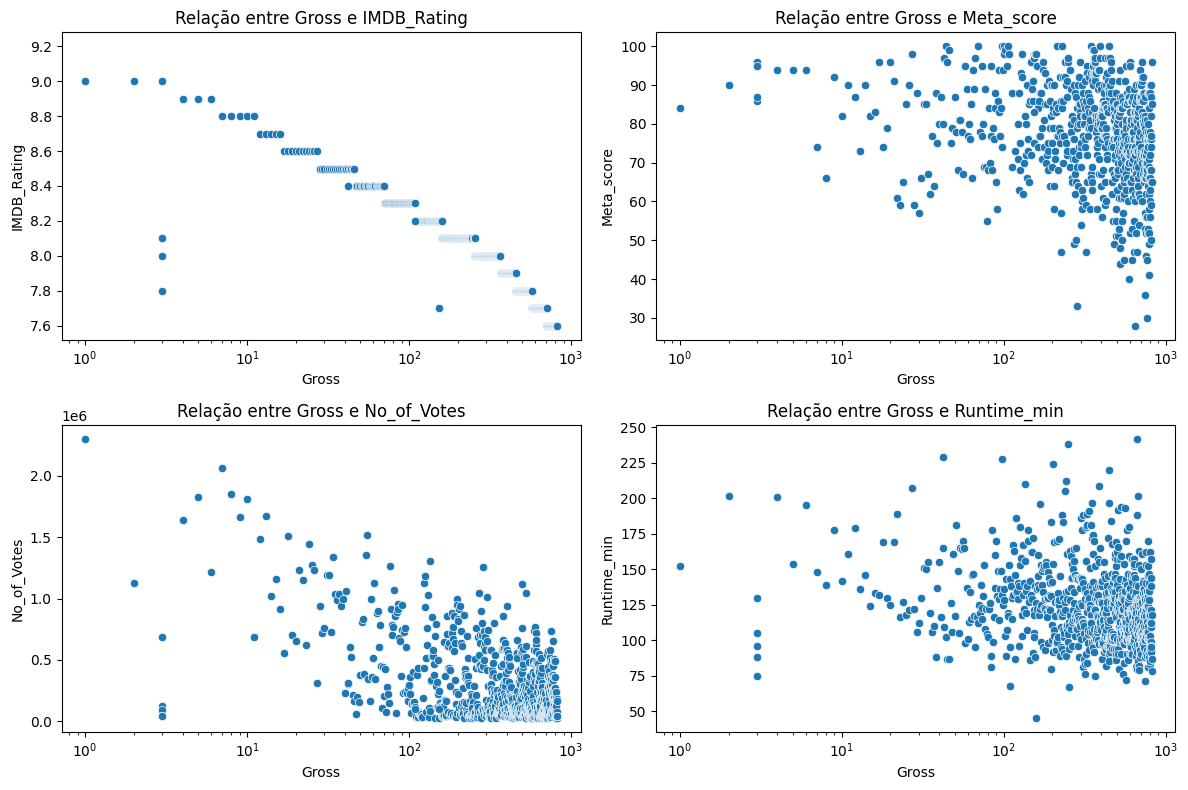

In [24]:
fig, axes = plt.subplots(figsize=(12, 8), ncols=2, nrows=2)
axes = axes.flatten()
for i, var in enumerate(variaveis_quantitativas):
    ax = sns.scatterplot(data = dados, x = 'Gross', y = var, ax = axes[i])
    #usamos log pq os valores de Gross, são exorbitante e acaba atrapalhando a viz
    ax.set_xscale('log')
    ax.set_title(f'Relação entre Gross e {var}')
plt.tight_layout()
plt.show()

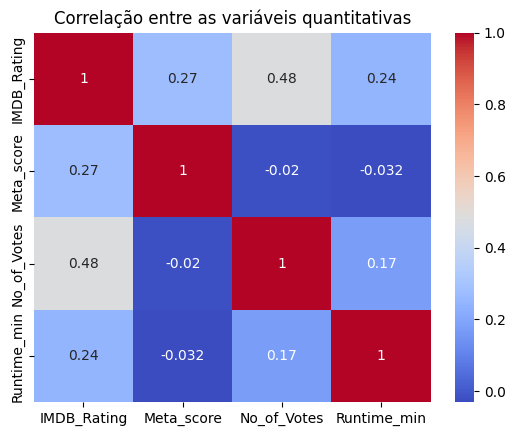

In [25]:
corr = dados[variaveis_quantitativas].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre as variáveis quantitativas')
plt.show()

---


*   Surpreendentemente parece existir uma relação negativa entre `IMDB Rating` e faturamento do filme, quanto maior a nota do filme menor tende a ser seu faturamento
*   A relação entre O `Meta Scorre` e fatruamento também parece seguir uma correlação negativa, só que menos linear em relação ao `IMDB Rating`


*   Tempo de filme e faturamento, não existe um padrão vísivel, o que faz sentido já que a maioria dos filmes tem um tempo de 100 a 170 minutos de filme


*   Existe uma boa correlação entre o número de votos e `IMDB Rating`, com 0.48 arriscaria dizer que pode ser a melhor correlação entre todas as varíaveis


*   O Meta score e o Tempo de filme(`Runtime_min`), mostram uma ótima correlação positiva em relação ao IMBD Rating



---




In [26]:
dict_dados

,variavel,descricao,tipo,subtipo
0,Title,Título do filme,qualitativa,nominal
1,Released_Year,Ano de lançamento,qualitativa,ordinal
2,Certificate,Classificação indicativa,qualitativa,ordinal
3,Runtime,Duração do filme,quantitativa,contínua
4,Genre,Gênero do filme,qualitativa,nominal
5,IMDB_Rating,Nota do IMDB,quantitativa,contínua
6,Overview,Resumo do filme,qualitativa,nominal
7,Meta_score,Nota do metacritic,quantitativa,contínua
8,Director,Diretor do filme,qualitativa,nominal
9,Star1,Primeiro ator ou Protagonista,qualitativa,nominal


In [27]:
dados['Genre'].describe()

count       999
unique      202
top       Drama
freq         84
Name: Genre, dtype: object

In [28]:
dados_genre = dados['Genre'].str.split(', ').explode()
dados_genre = dados_genre.value_counts().reset_index()
dados_genre


,Genre,count
0,Drama,723
1,Comedy,233
2,Crime,209
3,Adventure,196
4,Action,189
5,Thriller,137
6,Romance,125
7,Biography,109
8,Mystery,99
9,Animation,82


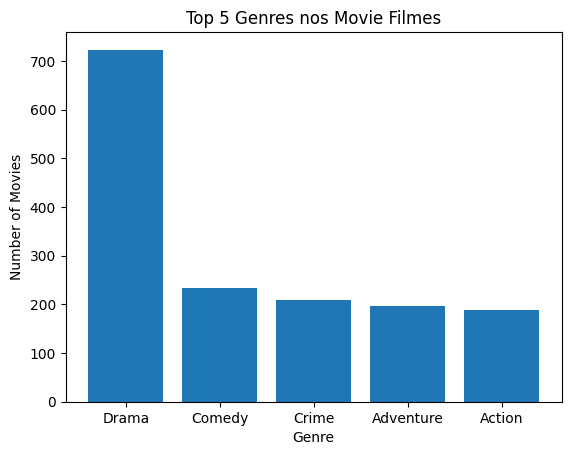

In [29]:
plt.bar(
    x = dados_genre.head(5)['Genre'],
    height = dados_genre.head(5)['count']
)
plt.title('Top 5 Genres nos Movie Filmes')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

---


*   Drama é o tema mais comum nos filmes, praticamente todos os filmes tem um pouco de drama
*   Enquanto os outros genêros aparecem de maneira mais igualitaria, a quantiade de genêros poderia ser diluida, dado que muitos são parecidos

---



In [30]:
from wordcloud import WordCloud, STOPWORDS
texto = ' '.join(dados['Overview'].dropna())

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400).generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Palavras mais comuns nos resumos dos filmes')
plt.show()



ModuleNotFoundError: No module named 'wordcloud'

---


*   Com base nas palavras mais comuns usado no `Overview` não nos dá muita informação

*   Existem algumas palavras que se destacam e aparecem com bastante frequência nas sinopses como 'life', 'family', love', palavras essas que podem estar muito ligada aos filmes de dramas, que é justamente o genêro mais comum nos filmes

---



In [31]:
#Olhando os 10 filmes com maiores notas

dados[['Series_Title','IMDB_Rating']].head(10).sort_values(ascending = False,by = 'IMDB_Rating')

,Series_Title,IMDB_Rating
0,The Godfather,9.2
1,The Dark Knight,9.0
2,The Godfather: Part II,9.0
3,12 Angry Men,9.0
4,The Lord of the Rings: The Return of the King,8.9
5,Pulp Fiction,8.9
6,Schindler's List,8.9
7,Inception,8.8
8,Fight Club,8.8
9,The Lord of the Rings: The Fellowship of the Ring,8.8


In [32]:
dados[['Series_Title','Meta_score']].head(10).sort_values(ascending=False,by = 'Meta_score')

,Series_Title,Meta_score
0,The Godfather,100.0
3,12 Angry Men,96.0
5,Pulp Fiction,94.0
4,The Lord of the Rings: The Return of the King,94.0
6,Schindler's List,94.0
9,The Lord of the Rings: The Fellowship of the Ring,92.0
2,The Godfather: Part II,90.0
1,The Dark Knight,84.0
7,Inception,74.0
8,Fight Club,66.0




---

* A  recomendação com base no IMDB Rating:

  1.   The God Father
  2.   The Dark Night
  3.   Pulp Fiction

* Caso fosse com base na nota do Meta Score:
  
    1.   The God Father
    2.   12 Angry Men
    3.   Pulp Fiction

* Interessante notar que o top 10 se mantém o mesmo independente, se é com base no `Meta Score` ou `IMDB Rating`, o que mudar são as posiçoes.Isso mostra que, para filmes muito aclamados, a opinião da crítica e do público tende a convergir

* Se fosse recomendar apenas 1 seria 'O poderoso Chefão(The God Father), que é unamidade tanto entre os os críticos quanto o público geral





---



# Modelagem de Dados

In [33]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
 15  Runtime_min    999 non-null    int64  
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [34]:
dados.nunique()

Series_Title     998
Released_Year    100
Certificate       16
Runtime          140
Genre            202
IMDB_Rating       16
Overview         999
Meta_score        63
Director         548
Star1            659
Star2            840
Star3            890
Star4            938
No_of_Votes      998
Gross            822
Runtime_min      140
dtype: int64

---
Olhando esses dados o que podem ajudar na criação de um modelo de machine learning são:
  Meta Score, Runtime_min, No_of_Votes, Gross e se transformado talvez o certificate(podemos transformar o indicativa brasileira que tem menos valores), vamos fazer algo parecido com gênero, todos os outros parecem ter valores demais alguns são praticamente um valor por linha, o que não ajuda em nada

In [35]:
variaveis = ['Meta_score','No_of_Votes','Gross','Runtime','Genre','Certificate']
target = 'IMDB_Rating'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
!pip install feature_engine
from feature_engine import encoding
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer


ImportError: cannot import name 'OneHotEncoder' from 'encodings' (C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\encodings\__init__.py)

In [37]:
dados[variaveis].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Meta_score   842 non-null    float64
 1   No_of_Votes  999 non-null    int64  
 2   Gross        830 non-null    object 
 3   Runtime      999 non-null    object 
 4   Genre        999 non-null    object 
 5   Certificate  898 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


In [38]:
X_train, X_test, y_train, y_test = train_test_split(dados[variaveis], dados[target], test_size=0.2, random_state=42)

In [39]:
#lidar com dados faltantes
X_train.isnull().sum()

Meta_score     119
No_of_Votes      0
Gross          134
Runtime          0
Genre            0
Certificate     79
dtype: int64

In [40]:
X_test.isnull().sum()

Meta_score     38
No_of_Votes     0
Gross          35
Runtime         0
Genre           0
Certificate    22
dtype: int64

In [41]:
def transform_float(variavel):
    X_train[variavel] = X_train[variavel].str.replace(',', '').str.replace('min','').astype(float)
    X_test[variavel] = X_test[variavel].str.replace(',', '').str.replace('min','').astype(float)

    return X_train, X_test

In [42]:
variaveis_quanti = ['Meta_score','No_of_Votes','Gross','Runtime']
variaveis_qualit = ['Certificate']

In [43]:
transform_float('Gross')
transform_float('Runtime')

(     Meta_score  No_of_Votes       Gross  Runtime  \
 778        73.0       138356  75331600.0    152.0   
 286         NaN        45434     39481.0    105.0   
 165         NaN        49300         NaN    160.0   
 960        52.0       131101   3796699.0    134.0   
 493        67.0       390334   7757130.0    107.0   
 ..          ...          ...         ...      ...   
 106        88.0       369007  51973029.0    160.0   
 270        57.0       371271  13782838.0    109.0   
 860        87.0       174119  51081062.0    110.0   
 435        93.0        56305  12535000.0    141.0   
 102        79.0       918562   2832029.0     99.0   
 
                            Genre Certificate  
 778      Biography, Drama, Music           A  
 286        Crime, Drama, Mystery          GP  
 165      Action, Comedy, Romance           U  
 960            Mystery, Thriller           A  
 493         Comedy, Crime, Drama           R  
 ..                           ...         ...  
 106    Biogra

In [44]:
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train[variaveis_quanti])
X_train[variaveis_quanti] = imputer.transform(X_train[variaveis_quanti])
X_test[variaveis_quanti] = imputer.transform(X_test[variaveis_quanti])

In [45]:
X_train.isnull().sum()

Meta_score      0
No_of_Votes     0
Gross           0
Runtime         0
Genre           0
Certificate    79
dtype: int64

In [46]:
X_train['Certificate'] = X_train['Certificate'].fillna('No certificate')
X_test['Certificate'] = X_test['Certificate'].fillna('No certificate')

In [47]:
onehot = encoding.OneHotEncoder(variables=['Certificate'])
onehot.fit(X_train)
X_train = onehot.transform(X_train)
X_test = onehot.transform(X_test)
X_train

,Meta_score,No_of_Votes,Gross,Runtime,Genre,Certificate_A,Certificate_GP,Certificate_U,Certificate_R,Certificate_UA,...,Certificate_PG,Certificate_Passed,Certificate_G,Certificate_16,Certificate_Unrated,Certificate_Approved,Certificate_TV-14,Certificate_TV-PG,Certificate_TV-MA,Certificate_U/A
778,73.0,138356.0,75331600.0,152.0,"Biography, Drama, Music",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,79.0,45434.0,39481.0,105.0,"Crime, Drama, Mystery",0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,79.0,49300.0,24149632.0,160.0,"Action, Comedy, Romance",0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
960,52.0,131101.0,3796699.0,134.0,"Mystery, Thriller",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
493,67.0,390334.0,7757130.0,107.0,"Comedy, Crime, Drama",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,88.0,369007.0,51973029.0,160.0,"Biography, Drama, History",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
270,57.0,371271.0,13782838.0,109.0,"Horror, Mystery, Sci-Fi",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,87.0,174119.0,51081062.0,110.0,"Action, Adventure, Thriller",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,93.0,56305.0,12535000.0,141.0,"Action, Drama, Western",0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
X_train.sum()

,0
Meta_score,62375.0
No_of_Votes,224865873.0
Gross,49319775359.0
Runtime,97959.0
Genre,"Biography, Drama, MusicCrime, Drama, MysteryAc..."
Certificate_A,147
Certificate_GP,2
Certificate_U,187
Certificate_R,123
Certificate_UA,149


In [48]:
#Transformar a coluna 'Genre', transformando os genêros em colunas e aplicando 1 ou 0
dados['Genre'].str.split(', ').explode().value_counts()


Genre
Drama        723
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
History       56
Family        56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: count, dtype: int64

In [49]:
X_train = pd.concat([X_train.drop('Genre', axis=1), X_train['Genre'].str.get_dummies(sep = ',')], axis=1)
X_test = pd.concat([X_test.drop('Genre', axis=1), X_test['Genre'].str.get_dummies(sep = ',')], axis=1)

# Algumas colunas podem faltar, quando usar o OneHot
missing_cols = set(X_train.columns) - set(X_test.columns)
for c in missing_cols:
    X_test[c] = 0
# Garantindo as colunas na divisão de treino
X_test = X_test[X_train.columns]


X_train.head()

,Meta_score,No_of_Votes,Gross,Runtime,Certificate_A,Certificate_GP,Certificate_U,Certificate_R,Certificate_UA,Certificate_No certificate,...,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,Horror,Mystery,Thriller,Western
778,73.0,138356.0,75331600.0,152.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,79.0,45434.0,39481.0,105.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
165,79.0,49300.0,24149632.0,160.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
960,52.0,131101.0,3796699.0,134.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
493,67.0,390334.0,7757130.0,107.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
variaveis_quanti

['Meta_score', 'No_of_Votes', 'Gross', 'Runtime']

In [51]:
#Padronizando os valores altos
variaveis_quanti_altas = ['No_of_Votes','Gross']
scaler = StandardScaler()
scaler.fit(X_train[variaveis_quanti_altas])
X_train[variaveis_quanti_altas] = scaler.transform(X_train[variaveis_quanti_altas])
X_test[variaveis_quanti_altas]= scaler.transform(X_test[variaveis_quanti_altas])

In [52]:
log_transformer = FunctionTransformer(np.log1p, validate=True)
log_transformer.fit(X_train[variaveis_quanti_altas])
X_train[variaveis_quanti_altas] = log_transformer.transform(X_train[variaveis_quanti_altas])
X_test[variaveis_quanti_altas] = log_transformer.transform(X_test[variaveis_quanti_altas])

# Escolhendo um modelo

In [53]:
X_train.isna().sum()

Meta_score                    0
No_of_Votes                   0
Gross                         0
Runtime                       0
Certificate_A                 0
Certificate_GP                0
Certificate_U                 0
Certificate_R                 0
Certificate_UA                0
Certificate_No certificate    0
Certificate_PG-13             0
Certificate_PG                0
Certificate_Passed            0
Certificate_G                 0
Certificate_16                0
Certificate_Unrated           0
Certificate_Approved          0
Certificate_TV-14             0
Certificate_TV-PG             0
Certificate_TV-MA             0
Certificate_U/A               0
 Action                       0
 Adventure                    0
 Biography                    0
 Comedy                       0
 Crime                        0
 Drama                        0
 Family                       0
 Fantasy                      0
 Film-Noir                    0
 History                      0
 Horror 

In [54]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
X_train.head()

,Meta_score,No_of_Votes,Gross,Runtime,Certificate_A,Certificate_GP,Certificate_U,Certificate_R,Certificate_UA,Certificate_No certificate,...,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,Horror,Mystery,Thriller,Western
778,73.0,-0.565382,0.125685,152.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,79.0,-1.245927,-0.934589,105.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
165,79.0,-1.206165,-0.461895,160.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
960,52.0,-0.604687,-0.844590,134.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
493,67.0,0.284198,-0.757750,107.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [56]:
X_test.head()

,Meta_score,No_of_Votes,Gross,Runtime,Certificate_A,Certificate_GP,Certificate_U,Certificate_R,Certificate_UA,Certificate_No certificate,...,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,Horror,Mystery,Thriller,Western
453,93.0,-1.128971,-0.469732,170.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
793,85.0,-1.398382,-0.862331,95.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
209,79.0,1.009920,0.714842,149.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
309,79.0,-1.410950,-0.693830,135.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
740,70.0,-1.134014,-0.902533,108.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
predicoes = modelo.predict(X_test)

In [58]:
#Medindo a precisão do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
print(f'Erro quadrado médio:{mean_squared_error(y_test, predicoes)}')
print(f'Erro médio absoluto:{mean_absolute_error(y_test, predicoes)}')
print(f'Coeficiente de determinação:{r2_score(y_test, predicoes)}')

Erro quadrado médio:0.05098132673608944
Erro médio absoluto:0.18419996104277278
Coeficiente de determinação:0.2233665417084666


---
 O principal problema aqui foi o coeficiente de determinação, que explicou bem foi a variancia dos dados, talvez usar um modelo mais complexo, pode ser interessante vamos testar.
 * Modelo de Regressão Linear simples:


    1.   Erro quadrado médio :0.049
    2.   Erro médio absoluto:0.183
    3.   Coeficiente de determinação:0.239
 * Modelo RandomForestRegressor:
  

    1. Erro quadrado médio:0.040
    2. Erro médio absoluto:0.158
    3. Coeficiente de determinação:0.377



---


In [60]:
#Testnaod outro modelo RandomForest
from sklearn.ensemble import RandomForestRegressor
modeloForest = RandomForestRegressor()
modeloForest.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
predicoes2 = modeloForest.predict(X_test)

In [ ]:
#metricas
print(f'Erro quadrado médio:{mean_squared_error(y_test, predicoes2)}')
print(f'Erro médio absoluto:{mean_absolute_error(y_test, predicoes2)}')
print(f'Coeficiente de determinação:{r2_score(y_test, predicoes2)}')

Erro quadrado médio:0.04064214500000002
Erro médio absoluto:0.15953500000000007
Coeficiente de determinação:0.3808703765766863


In [62]:
#Testando o Gradiente
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [63]:
predicoes3 = gbr.predict(X_test)

In [64]:
print(f'Erro quadrado médio:{mean_squared_error(y_test, predicoes3)}')
print(f'Erro médio absoluto:{mean_absolute_error(y_test, predicoes3)}')
print(f'Coeficiente de determinação:{r2_score(y_test, predicoes3)}')

Erro quadrado médio:0.04015113200987455
Erro médio absoluto:0.1591594065265278
Coeficiente de determinação:0.3883503136634797


In [65]:
print(f'Erro quadrado médio:{mean_squared_error(y_test, predicoes4)}')
print(f'Erro médio absoluto:{mean_absolute_error(y_test, predicoes4)}')
print(f'Coeficiente de determinação:{r2_score(y_test, predicoes4)}')

NameError: name 'predicoes4' is not defined

# Modelo Final : Random Forest Regressor

Com base no conjunto de variáveis selecionadas, o Random Forest Regressor apresentou o melhor desempenho na captura das relações entre elas. Como o modelo apresentava multicolinearidade, considero que essa foi a escolha mais adequada em comparação a modelos mais simplificados. Além disso, optei por evitar algoritmos excessivamente complexos, dado que a amostra disponível era relativamente pequena

In [ ]:
## Criando a pipeline

In [70]:
class GenreBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        genres = X['Genre'].fillna('').str.split(', ').apply(lambda x: [g.strip() for g in x if g.strip() != ''])
        self.mlb.fit(genres)
        return self

    def transform(self, X):
        genres = X['Genre'].fillna('').str.split(', ').apply(lambda x: [g.strip() for g in x if g.strip() != ''])
        encoded = self.mlb.transform(genres)
        return pd.DataFrame(encoded, columns=self.mlb.classes_, index=X.index)

In [71]:
class RuntimeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        runtime = X['Runtime'].str.replace(' min', '', regex=False).astype(float)
        return runtime.to_frame(name='Runtime')
class GrossTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        gross = X['Gross'].fillna('0').str.replace(',', '', regex=False).astype(float)
        return gross.to_frame(name='Gross')

In [72]:
def build_processor():
    # numéricas
    numeric_features = ['Meta_score', 'No_of_Votes']
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy='median')),
        ("scaler", StandardScaler())
    ])

    # categóricas simples
    categorical_features = ['Certificate']
    categorical_transformer = Pipeline(steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    # colunas customizadas
    custom_transformers = [
        ("runtime", RuntimeTransformer(), ['Runtime']),
        ("gross", GrossTransformer(), ['Gross']),
        ("genre", GenreBinarizer(), ['Genre']),
    ]

    # ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ] + custom_transformers,
        remainder="drop"  # remove Series_Title, Director, etc
    )

    return preprocessor

In [79]:
preprocessor = build_processor()

In [80]:
preprocessor

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [81]:
meu_modelo = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("modelo", GradientBoostingRegressor())
    ]
)

In [82]:
variaveis = dados.columns.tolist()
variaveis.remove('IMDB_Rating')
target = 'IMDB_Rating'

In [83]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(dados[variaveis], dados[target], test_size=0.2, random_state=42)

In [84]:
meu_modelo.fit(X_train3, y_train3)

,steps,"[('preprocessor', ...), ('modelo', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [85]:
#Avaliando
predicoes5 = meu_modelo.predict(X_test3)

print(f'Erro quadrado médio:{mean_squared_error(y_test3, predicoes5)}')
print(f'Erro médio absoluto:{mean_absolute_error(y_test3, predicoes5)}')
print(f'Coeficiente de determinação:{r2_score(y_test3, predicoes5)}')

Erro quadrado médio:0.038020491723423186
Erro médio absoluto:0.15628081737748048
Coeficiente de determinação:0.4208078160468105


In [86]:
!pip install joblib

import joblib

joblib.dump(meu_modelo, 'modelo_treinado.pkl')

['modelo_treinado.pkl']